In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('NPD.csv', sep = ',', engine='python')


In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275635 entries, 0 to 275634
Data columns (total 34 columns):
Outlet             275635 non-null object
Brand              275635 non-null object
Model              275635 non-null object
SKU                275635 non-null object
Size               269950 non-null float64
Sub Res            275635 non-null object
HDR                275635 non-null object
Date               275635 non-null object
NPD ASP            275635 non-null float64
Price              275635 non-null int64
Units              275635 non-null float64
Dollars            275635 non-null int64
Stores             275635 non-null int64
%Distribution      275635 non-null float64
DistributionLVL    275635 non-null object
UHD Segment        274995 non-null object
Backlight          275635 non-null object
Year               275635 non-null int64
Week               275635 non-null int64
Brand-SKU          275635 non-null object
Date2              275635 non-null object
UnitsFil

In [5]:
# df2 = df['Outlet', 'BrandGroup', 'Model', 'Size', 'Sub Res', 'Year', 'Week', 'PriceBand', 'Price', 'Units', 'Stores', 'Dollars']

df2 = pd.DataFrame(df, columns =['Outlet', 'BrandGroup', 'Model', 'Size', 'Sub Res', 'Year', 'Week', 'PriceBand', 'Price', 'Units', 'Stores', 'Dollars'])


# df2['UnitsPerStore'] = df2['Units']/df2['Stores']

df2.isnull().sum()

# df2.head()

df2['Units'] = df2['Units'].astype(int)






In [37]:
df3 = df2.groupby(['Outlet', 'BrandGroup', 'Year', 'Week', 'Size', 'Sub Res'])['Units', 'Dollars','Stores'].sum()

df3.head()

# type(df3)



Units  Dollars  Stores
Outlet           BrandGroup Year Week Size Sub Res                        
Remaining Retail OPP        2016 52   19.0 HD           0        0       1
                                      24.0 HD          30     3863      40
                                      28.0 HD           1      177       1
                                      32.0 FHD          2      238       2
                                           HD        2745   332332    1035

In [41]:
df3 = df3.reset_index()

df3['UnitsPerStore'] = df3['Units']/df3['Stores']

def weeknum(week):
    if week < 10:
        return '0' +  str(week)
    else:
        return str(week)

 
#Create Year Week String Key

df3['YearWk'] = df['Year'].astype(str) + df['Week'].apply(weeknum)
df3['YearWk'] = df3['YearWk'].astype(int)


df3['Size'] = df3['Size'].astype(int)


df3['Units'].replace(0, np.nan, inplace=True)

df3['Units'].dropna(axis=0, how='all', inplace=True)

In [42]:
df3.head()

,level_0,index,Outlet,BrandGroup,Year,Week,Size,Sub Res,Units,Dollars,Stores,UnitsPerStore,YearWk
0,0,0,Remaining Retail,OPP,2016,52,19,HD,NaN,0,1,NaN,201652
1,1,1,Remaining Retail,OPP,2016,52,24,HD,30.0,3863,40,0.750000,201701
2,2,2,Remaining Retail,OPP,2016,52,28,HD,1.0,177,1,1.000000,201702
3,3,3,Remaining Retail,OPP,2016,52,32,FHD,2.0,238,2,1.000000,201703
4,4,4,Remaining Retail,OPP,2016,52,32,HD,2745.0,332332,1035,2.652174,201704


In [27]:
type(df3)

pandas.core.frame.DataFrame

In [23]:
df3.describe()

,index,Year,Week,Size,Units,Dollars,Stores,UnitsPerStore,YearWk
count,73052.000000,73052.000000,73052.000000,73052.000000,73052.000000,7.305200e+04,73052.000000,7.305200e+04,73052.000000
mean,36525.500000,2017.837951,24.495428,49.053058,1019.085446,4.208585e+05,779.131523,NaN,201810.801279
std,21088.440269,0.800129,14.649397,15.742693,4513.127468,1.955901e+06,2163.327255,NaN,77.194152
min,0.000000,2016.000000,1.000000,7.000000,-1424.000000,-5.714030e+05,0.000000,-inf,201652.000000
25%,18262.750000,2017.000000,12.000000,40.000000,3.000000,1.100000e+03,1.000000,4.439830e-01,201735.000000
50%,36525.500000,2018.000000,24.000000,49.000000,58.000000,2.441800e+04,2.000000,1.461538e+00,201818.000000
75%,54788.250000,2018.000000,36.000000,60.000000,576.000000,2.005255e+05,457.000000,1.533333e+01,201852.000000
max,73051.000000,2019.000000,52.000000,98.000000,409451.000000,1.244936e+08,29884.000000,inf,201936.000000


In [85]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
Outlet           4177 non-null object
BrandGroup       4177 non-null object
Year             4177 non-null int64
Week             4177 non-null int64
Units            4177 non-null int32
Stores           4177 non-null int64
UnitsPerStore    4177 non-null float64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 212.2+ KB


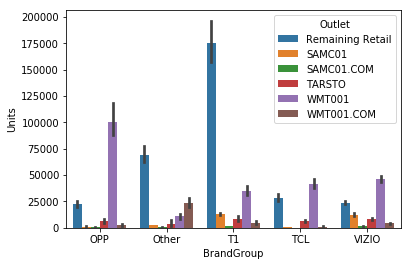

In [86]:
sns.barplot(x='BrandGroup', y='Units', hue='Outlet', data=df3)

In [84]:
df3.describe()

,Year,Week,Units,Stores,UnitsPerStore
count,4177.000000,4177.000000,4.177000e+03,4177.000000,4.177000e+03
mean,2017.875988,24.653340,2.212579e+04,13678.685660,-inf
std,0.800168,14.535628,4.845458e+04,30330.866797,NaN
min,2016.000000,1.000000,-5.600000e+01,0.000000,-inf
25%,2017.000000,12.000000,1.102000e+03,20.000000,1.137713e+00
50%,2018.000000,24.000000,6.126000e+03,91.000000,8.021614e+00
75%,2019.000000,36.000000,2.286200e+04,10780.000000,8.483871e+01
max,2019.000000,52.000000,1.057280e+06,169794.000000,1.086200e+04
